<a href="https://colab.research.google.com/github/jdasam/mas1004/blob/2024/live_coding/4_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification
- In this notebook we will use the MNIST dataset to train a neural network to classify handwritten digits.

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# make plt grayscale as default
plt.rcParams['image.cmap'] = 'gray'

DEV = 'cuda' # Use GPU # library for NVIDIA GPU
assert torch.cuda.is_available(), "Make sure you run this Colab in GPU"

## 0. Download Dataset

In [2]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 13.6MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
img, label = train_data[0]
print(img.shape), print(label)

torch.Size([1, 28, 28])
5


(None, None)

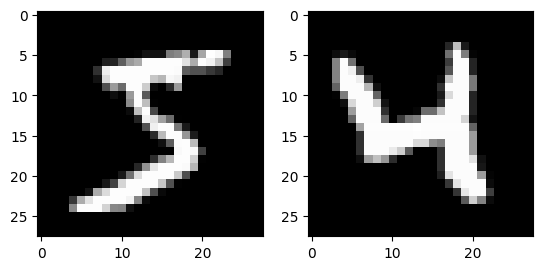

In [4]:
plt.subplot(1, 2, 1) # use 1 row, 2 column, and use 1st place
plt.imshow(img.squeeze())
plt.subplot(1,2,2)
plt.imshow(train_data[20][0].squeeze())

In [5]:
flattened_img = img.reshape(28 * 28)
flattened_img = img.reshape(-1)
flattened_img.shape

torch.Size([784])

In [6]:
# let's try to make a batch
# idx = 0

imgs = []
labels = []

for idx in range(100):
  img, label = train_data[idx]
  # print(img.shape, label)
  imgs.append(img)
  labels.append(label)
print(labels)
# use torch.stack to convert list of tensors to a single tensor with new dimesion

stack_result = torch.stack(imgs, dim=0)
print(f"stack in dim0 shape: {stack_result.shape}")

cat_result = torch.cat(imgs, dim=1)
print(f"cat in dim1 shape: {cat_result.shape}")

imgs = torch.stack(imgs, dim=0)
labels = torch.tensor(labels)

print(f"imgs.shape = {imgs.shape}, labels.shape = {labels.shape}")
print(labels[:10])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1]
stack in dim0 shape: torch.Size([100, 1, 28, 28])
cat in dim1 shape: torch.Size([1, 2800, 28])
imgs.shape = torch.Size([100, 1, 28, 28]), labels.shape = torch.Size([100])
tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


In [7]:
# flatten that img tensor so that each datasample has 784 numbers

# imgs.shape = [100, 1, 28, 28]
# -> [100, 784]: 100 samples, and each of sample is 784-dim vector

# using reshape
reshaped_imgs = imgs.reshape(100, 784)
reshaped_imgs = imgs.reshape(100, -1)
reshaped_imgs = imgs.reshape(50, -1) # what would be the shape of this?
print(imgs.numel(), reshaped_imgs.shape)
# reshape has to preserve number of elements in the tensor

reshaped_imgs = imgs.reshape(78400).reshape(100, -1) # Reshape is trying to flatten everything and arange tensor again

flattend_imgs = imgs.flatten(start_dim=1)
print(flattend_imgs.shape)



78400 torch.Size([50, 1568])
torch.Size([100, 784])


In [8]:
import torch.nn as nn

layer1 = nn.Linear(784, 64)
relu = nn.ReLU()
layer2 = nn.Linear(64,64)

x = flattend_imgs
# x = layer1(x)
# x = relu(x)
# x = layer2(x)

layers = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10))

layers(x)

tensor([[-9.2274e-02,  2.4413e-02, -6.3413e-02,  1.1385e-01, -1.0064e-01,
         -4.5700e-02, -1.1104e-01, -2.9401e-02,  4.6581e-02, -7.7787e-02],
        [-5.8952e-02, -1.8600e-03, -4.5992e-02,  1.3329e-01, -9.2773e-02,
         -3.1835e-02, -1.0991e-01, -2.4711e-02,  9.6005e-03, -8.7778e-02],
        [-7.8293e-02,  8.9830e-03, -5.6575e-02,  1.1423e-01, -9.1792e-02,
         -4.4564e-02, -1.0361e-01, -3.7725e-02,  1.4814e-02, -9.8619e-02],
        [-7.8189e-02, -1.3404e-02, -3.6588e-02,  1.1080e-01, -7.5600e-02,
         -5.1268e-02, -1.2594e-01, -2.0702e-02,  4.4855e-02, -1.2188e-01],
        [-6.1917e-02,  8.5982e-03, -3.6570e-02,  1.4246e-01, -8.4217e-02,
         -4.3461e-02, -9.8702e-02, -1.9489e-02,  3.5429e-02, -1.1813e-01],
        [-6.2349e-02,  1.1398e-02, -6.4427e-02,  8.3557e-02, -8.4444e-02,
         -3.2010e-02, -9.2288e-02, -1.0050e-02,  2.4885e-02, -8.7899e-02],
        [-7.2607e-02, -9.6317e-03, -4.4654e-02,  1.1864e-01, -7.4957e-02,
         -2.3854e-02, -1.1752e-0

In [9]:
# Let's compare batch computation and for loop computation

import time
device = 'cuda' # gpu driver
layers = layers.to(device) # move layer parameters to gpu
flattend_imgs = flattend_imgs.to(device)  # move data tensor to gpu

start_time = time.time()
layers(flattend_imgs)
end_time = time.time()
print(f"Batch computation: {end_time - start_time}")

start_time = time.time()
for sample in flattend_imgs:
  layers(sample)
end_time = time.time()
print(f"Sample for-loop computation: {end_time - start_time}")


Batch computation: 0.22916007041931152
Sample for-loop computation: 0.06736016273498535


#### Extra: Practice on Reshape

In [10]:
dummy = torch.arange(12)
print(dummy)
print(dummy.reshape(3,4))
print(dummy.reshape(4,3))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [11]:
dummy34 = dummy.reshape(3,4)
dummy43 = dummy.reshape(4,3)

dummy34.permute(1,0).reshape(3,4) ## same with dummy34.T

tensor([[ 0,  4,  8,  1],
        [ 5,  9,  2,  6],
        [10,  3,  7, 11]])

In [12]:
# label_tensor = torch.tensor(label_list)
# flattened_data.shape, label_tensor.shape

In [13]:
# first_data = flattened_data[1]
# plt.imshow(first_data.reshape(28, 28))

In [14]:
# first_data.shape, first_data

# 0.0 Using DataLoader

In [15]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
img, label = train_data[0] ## calling __getitem__ method of train_data
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [17]:
class Dataset:
  def __init__(self, data):
    self.data = data

  # To implement the dataset, you have to declare two methods
  # __getitem__ and __len__

  def __getitem__(self, idx):
    # this method is called when you do train_set[idx]
    # here, we want to return our idx-th datasample, in proper format
    img, label = self.data[idx]
    # return img, label
    return img.reshape(-1), label

  def __len__(self):
    # how many datasample we have in our dataset?
    # what is the maximum valid idx for __getitem__
    return len(self.data)

train_set = Dataset(train_data)
# train_set[15]
len(train_set), train_set[523][0].shape

(60000, torch.Size([784]))

In [18]:
from typing import List, Tuple

target_idx = [0, 1, 2, 3]
target_idx = [23845, 281, 4074, 235]

raw_batch = []

# for idx in target_idx:
#   idx_sample = train_set[idx]
#   raw_batch.append(idx_sample)
raw_batch = [train_set[idx] for idx in target_idx]
print(type(raw_batch), type(raw_batch[0])) # raw batch is list of tuple

# below is what collate_fn do

def my_custom_collate_fn(raw_batch: List[Tuple]) -> Tuple[torch.Tensor, torch.Tensor]:
  img_batch = [sample[0] for sample in raw_batch ]
  label_batch = [sample[1] for sample in raw_batch ]

  # print(type(img_batch), type(img_batch[0]), type(label_batch[0]))
  # print(f"stack shape: {torch.stack(img_batch).shape}, cat shape: {torch.cat(img_batch).shape}")
  img_batch = torch.stack(img_batch)
  label_batch = torch.tensor(label_batch)

  # img_batch.shape, label_batch.shape
  return img_batch, label_batch


batch = my_custom_collate_fn(raw_batch)
print(type(batch), type(batch[0]), type(batch[1]))

imgs, labels = batch
imgs.shape, labels.shape

<class 'list'> <class 'tuple'>
<class 'tuple'> <class 'torch.Tensor'> <class 'torch.Tensor'>


(torch.Size([4, 784]), torch.Size([4]))

In [19]:
# use dataloader

train_loader = torch.utils.data.DataLoader(train_set,
                                           batch_size=64,
                                           shuffle=True,
                                           collate_fn=my_custom_collate_fn
                                           )

for batch in train_loader:
  # do something
  print(batch[0].shape, batch[1].shape)
  break

# if you want to get only one single batch from the DataLoader, you can do below
# iterator = iter(train_loader)
# next(iterator)
batch = next(iter(train_loader))

torch.Size([64, 784]) torch.Size([64])


## 1. Make a Model

In [31]:
class Classifier(nn.Module):
  def __init__(self, hidden_dim, input_dim=784, out_dim=10):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, out_dim)
    )

  def forward(self, x:torch.Tensor):
    logit = self.layers(x)
    prob = logit.softmax(dim=-1)

    return prob, logit

model = Classifier(hidden_dim=64)

prob, logit = model(batch[0])
prob.shape, prob[0]

(torch.Size([64, 10]),
 tensor([0.0935, 0.0907, 0.0957, 0.0853, 0.1095, 0.1086, 0.1093, 0.1110, 0.0939,
         0.1024], grad_fn=<SelectBackward0>))

## 1.1 Make Softmax

## 2. Training

### 2.1 Make a Loss Function
- Define Negative Log Likelihood Loss
  - $L = -\sum_{i=1}^n\log(\hat{y}_{i}^{(c)})$
  - $y_{i}^{(c)} \in (0, 1)$: predicted probability for $i$-th sample to be class $c$, where $c$ is the ground truth label for $i$-th sample
- Define Cross Entropy Loss
  - $L = -\sum_{i=1}^ny_{i}\log(\hat{y}_{i})$
  - $ y_{i} \in (0,1)^C$: ground truth label for $i$-th sample to be class $c$. $C$ denotes the number of classes.
    - One-hot encoding: $y_{i} = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$
  - $ \hat{y}_{i} \in (0, 1)^C$: predicted probability for $i$-th sample to be class $c$
    - e.g.: $\hat{y}_{i} = [0.1, 0.1, 0.5, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1]$

In [32]:
imgs, labels = batch
prob, logit = model(imgs)
print(labels)
# calculate loss by comparing prob and labels
prob[:16,:-1]

tensor([7, 3, 7, 2, 0, 2, 8, 8, 3, 6, 7, 8, 1, 6, 2, 0, 4, 7, 7, 3, 6, 1, 4, 9,
        2, 2, 6, 7, 0, 7, 6, 1, 9, 1, 1, 3, 0, 5, 8, 0, 6, 8, 1, 1, 8, 3, 3, 6,
        7, 2, 6, 7, 4, 8, 7, 0, 2, 6, 9, 7, 0, 4, 9, 0])


tensor([[0.0935, 0.0907, 0.0957, 0.0853, 0.1095, 0.1086, 0.1093, 0.1110, 0.0939],
        [0.0959, 0.0870, 0.0958, 0.0807, 0.1078, 0.1085, 0.1146, 0.1126, 0.0936],
        [0.0943, 0.0894, 0.0943, 0.0835, 0.1060, 0.1105, 0.1108, 0.1172, 0.0894],
        [0.0934, 0.0926, 0.0937, 0.0867, 0.1089, 0.1049, 0.1106, 0.1158, 0.0931],
        [0.0939, 0.0892, 0.0926, 0.0861, 0.1094, 0.1091, 0.1105, 0.1127, 0.0915],
        [0.0971, 0.0917, 0.0918, 0.0856, 0.1072, 0.1093, 0.1122, 0.1152, 0.0900],
        [0.0912, 0.0898, 0.0921, 0.0839, 0.1066, 0.1079, 0.1117, 0.1204, 0.0900],
        [0.0951, 0.0910, 0.0933, 0.0862, 0.1101, 0.1054, 0.1120, 0.1125, 0.0932],
        [0.0934, 0.0869, 0.0940, 0.0867, 0.1077, 0.1088, 0.1129, 0.1121, 0.0950],
        [0.0921, 0.0930, 0.0937, 0.0843, 0.1103, 0.1062, 0.1109, 0.1154, 0.0942],
        [0.0924, 0.0916, 0.0954, 0.0851, 0.1094, 0.1097, 0.1087, 0.1090, 0.0970],
        [0.0937, 0.0880, 0.0944, 0.0854, 0.1078, 0.1084, 0.1131, 0.1132, 0.0921],
        [0.0933,

In [40]:
# get nll loss

# get the probabilty of correct class for each sample

correct_class_probs = []
for indiv_prob, indiv_label in zip(prob, labels):
  # print(indiv_label, indiv_prob)
  prob_of_correct_class = indiv_prob[indiv_label]
  correct_class_probs.append(prob_of_correct_class)
torch.stack(correct_class_probs), prob[torch.arange(len(prob)), labels]

def my_nll_fn(prob, labels):
  return -torch.log(prob[torch.arange(len(prob)), labels] + 1e-8).mean()

correct_probs = prob[torch.arange(len(prob)), labels]


loss_fn = torch.nn.NLLLoss()
cross_entropy_fn = torch.nn.CrossEntropyLoss()
# torch.nn.NLLLoss expects log-probability
nll_torch = loss_fn(prob.log(), labels)
# torch.nn.CrossEntropyLoss expects logit
# softmax contains exponential, and we are applying log to the softmax
ce_torch = cross_entropy_fn(logit, labels)

nll = -torch.log(correct_probs).mean()
nll = my_nll_fn(prob, labels)

nll, nll_torch, ce_torch

(tensor(2.3099, grad_fn=<NegBackward0>),
 tensor(2.3099, grad_fn=<NllLossBackward0>),
 tensor(2.3099, grad_fn=<NllLossBackward0>))

### 2.2 Define Training Loop

In [44]:
print(isinstance(my_nll_fn, torch.nn.CrossEntropyLoss))
print(isinstance(cross_entropy_fn, torch.nn.CrossEntropyLoss))
print(isinstance(loss_fn, torch.nn.CrossEntropyLoss))

False
True
False


In [46]:
def train_one_step(model, optimizer, loss_function, input, target):
  pred, logit = model(input) # forward pass. compute the prediction
  # if loss_function == torch.nn.CrossEntropyLoss: # if loss_function is torch.nn.CrossEntropyLoss:
  if isinstance(loss_function, torch.nn.CrossEntropyLoss):
    loss = loss_function(logit, target)
  else:
    loss = loss_function(pred, target) # compute the loss
  loss.backward() # backpropagate theloss. compute the gradient
  optimizer.step() # update the parameters based on each gradient
  optimizer.zero_grad() # clear the gradient for every parameters
  return loss.item() # return the loss value

model = Classifier(hidden_dim=64)
optimizer = torch.optim.Adam(model.parameters())


for _ in range(100):
  loss = train_one_step(model, optimizer, cross_entropy_fn, imgs, labels)
  print(loss)


2.3124146461486816
2.2842438220977783
2.2603139877319336
2.2360048294067383
2.2103424072265625
2.182403326034546
2.151113271713257
2.116023540496826
2.077569007873535
2.035228967666626
1.9889642000198364
1.9385145902633667
1.8844975233078003
1.8272607326507568
1.7673392295837402
1.7044589519500732
1.6394293308258057
1.5726392269134521
1.5042738914489746
1.43446946144104
1.3640943765640259
1.2937618494033813
1.2237094640731812
1.1543071269989014
1.0860826969146729
1.0192009210586548
0.9541636109352112
0.8913471698760986
0.8310197591781616
0.7732612490653992
0.7180814146995544
0.6656787991523743
0.6160822510719299
0.5693345069885254
0.5251968502998352
0.4836662709712982
0.44454410672187805
0.4077688157558441
0.3733457028865814
0.3413451313972473
0.31169402599334717
0.28446999192237854
0.25951871275901794
0.2367459237575531
0.21585911512374878
0.19666768610477448
0.17914971709251404
0.1631065011024475
0.14844422042369843
0.13501033186912537
0.12272398173809052
0.11155564337968826
0.101451

### 2.3 Make Batch

In [47]:
batch = next(iter(train_loader))


### 2.4 Train

In [48]:
DEV = 'cuda' # all uppercase variable name means this variable is global variable

In [50]:
import time
from tqdm.auto import tqdm

model = Classifier(64)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
num_epochs = 5

model.to(DEV) # move model to cuda. Move model's parameter on GPU's VRAM

for epoch in tqdm(range(num_epochs)):
  for batch in tqdm(train_loader, leave=False):
    imgs, labels = batch
    imgs = imgs.to(DEV)  # Movetensor to GPU's VRAM
    labels = labels.to(DEV)
    loss = train_one_step(model, optimizer, cross_entropy_fn, imgs, labels)
    losses.append(loss)


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

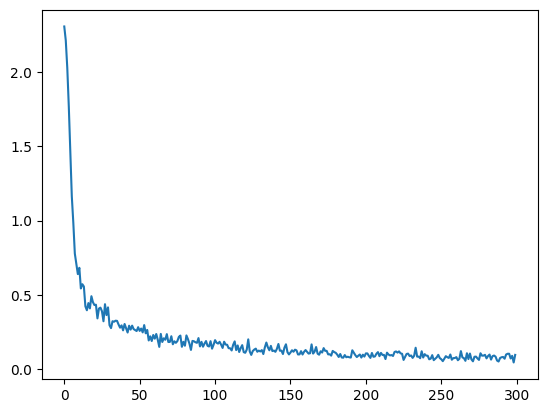

In [51]:
plt.plot(losses)

In [52]:
test_loader = torch.utils.data.DataLoader(Dataset(test_data), batch_size=1000, shuffle=False)

test_batch = next(iter(test_loader))
# this will make something like "batch in test_loader" (iterator)
# and only gets the first one
imgs, labels = test_batch
# imgs.shape

pred, logit = model(imgs.to(DEV))
pred.shape

torch.Size([1000, 10])

In [53]:
pred[:4]

tensor([[1.3435e-05, 4.0113e-07, 1.8740e-04, 1.8567e-04, 9.4351e-10, 8.6792e-06,
         1.0859e-09, 9.9956e-01, 2.4015e-05, 1.6391e-05],
        [2.5453e-08, 5.3378e-05, 9.9994e-01, 6.0892e-07, 7.9964e-15, 2.0363e-08,
         1.0472e-06, 4.1274e-11, 1.1393e-06, 1.1220e-13],
        [3.6629e-06, 9.9899e-01, 1.9744e-04, 7.7949e-05, 7.3541e-05, 1.4945e-05,
         7.8009e-05, 1.5153e-04, 3.8820e-04, 2.0427e-05],
        [9.9558e-01, 1.1984e-04, 2.6658e-03, 6.6923e-06, 1.5886e-07, 6.7630e-05,
         1.0576e-05, 4.9870e-04, 8.9300e-08, 1.0496e-03]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [55]:
# Convert probability prediction to Specific one category
# We want to get INDEX of probability that makes the maximum value

dummy = torch.tensor([4, 1 , -2, 6, 10, 1, 0])
# in this case, the maximum value is 10
# and 10 is index 4
torch.argmax(dummy)

tensor(4)

In [56]:
print(pred[:4])
print(torch.argmax(pred[:4], dim=-1))

tensor([[1.3435e-05, 4.0113e-07, 1.8740e-04, 1.8567e-04, 9.4351e-10, 8.6792e-06,
         1.0859e-09, 9.9956e-01, 2.4015e-05, 1.6391e-05],
        [2.5453e-08, 5.3378e-05, 9.9994e-01, 6.0892e-07, 7.9964e-15, 2.0363e-08,
         1.0472e-06, 4.1274e-11, 1.1393e-06, 1.1220e-13],
        [3.6629e-06, 9.9899e-01, 1.9744e-04, 7.7949e-05, 7.3541e-05, 1.4945e-05,
         7.8009e-05, 1.5153e-04, 3.8820e-04, 2.0427e-05],
        [9.9558e-01, 1.1984e-04, 2.6658e-03, 6.6923e-06, 1.5886e-07, 6.7630e-05,
         1.0576e-05, 4.9870e-04, 8.9300e-08, 1.0496e-03]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([7, 2, 1, 0], device='cuda:0')


In [58]:
predicted_class = torch.argmax(pred, dim=-1)
print(predicted_class[:20])
print(labels[:20])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4],
       device='cuda:0')
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])


In [63]:
# Get Accuracy

is_true = predicted_class.cpu() == labels # because it is boolean, it's better to
# start the variable name with is_

# get number of correct prediction
# get number of total prediction

acc = (is_true.sum() / is_true.numel()).item()
acc

0.9620000123977661

In [64]:
def get_accuracy(pred, labels):
  predicted_class = torch.argmax(pred, dim=-1)
  is_true = predicted_class.to(labels.device) == labels # because it is boolean, it's better to
  acc = (is_true.sum() / is_true.numel()).item()
  return acc


In [67]:
t_set, v_set = torch.utils.data.random_split(train_set, [50000, 10000])
len(t_set.indices), len(v_set.indices) # two sets indices are not overlapped each other

(50000, 10000)

In [70]:
def train_one_step_acc(model, optimizer, loss_function, input, target):
  pred, logit = model(input) # forward pass. compute the prediction
  # if loss_function == torch.nn.CrossEntropyLoss: # if loss_function is torch.nn.CrossEntropyLoss:
  if isinstance(loss_function, torch.nn.CrossEntropyLoss):
    loss = loss_function(logit, target)
  else:
    loss = loss_function(pred, target) # compute the loss
  loss.backward() # backpropagate theloss. compute the gradient
  optimizer.step() # update the parameters based on each gradient
  optimizer.zero_grad() # clear the gradient for every parameters
  acc = get_accuracy(pred, target)
  return loss.item(), acc # return the loss value

In [71]:
import time
from tqdm.auto import tqdm

model = Classifier(64)
t_set, v_set = torch.utils.data.random_split(train_set, [50000, 10000])
train_loader = torch.utils.data.DataLoader(t_set, batch_size=1000, shuffle=True)
valid_loader =  torch.utils.data.DataLoader(v_set, batch_size=1000, shuffle=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
train_acc = []
total_valid_acc = []
num_epochs = 5

model.to(DEV) # move model to cuda. Move model's parameter on GPU's VRAM

for epoch in tqdm(range(num_epochs)):
  for batch in tqdm(train_loader, leave=False):
    imgs, labels = batch
    imgs = imgs.to(DEV)  # Movetensor to GPU's VRAM
    labels = labels.to(DEV)
    loss, acc = train_one_step_acc(model, optimizer, cross_entropy_fn, imgs, labels)
    losses.append(loss)
    train_acc.append(acc)


  valid_acc_sum = 0
  with torch.inference_mode(): # Code below this line does not calculate gradient
    for batch in valid_loader:
      imgs, labels = batch
      imgs = imgs.to(DEV)  # Movetensor to GPU's VRAM
      labels = labels.to(DEV)
      pred, logit = model(imgs)
      acc = get_accuracy(pred, labels)
      valid_acc_sum += acc
  valid_acc = valid_acc_sum / len(valid_loader) # number of total batch
  total_valid_acc.append(valid_acc)



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

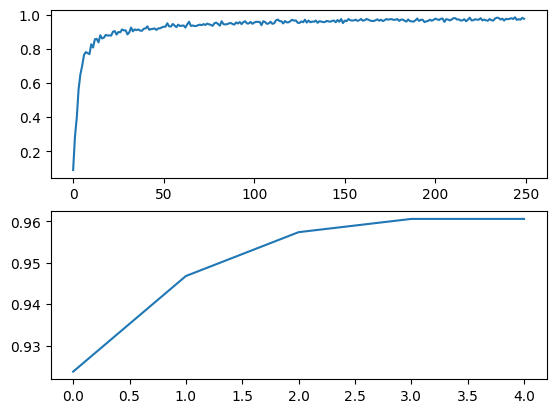

In [74]:
plt.subplot(2,1,1)
plt.plot(train_acc)
plt.subplot(2,1,2)
plt.plot(total_valid_acc)

In [76]:
# Check failure case

batch = next(iter(test_loader))

imgs, labels = batch
pred, logit = model(imgs.to(DEV))


In [77]:
predicted_labels = torch.argmax(pred, dim=-1).cpu()

In [80]:
torch.where(predicted_labels != labels)
# it gives in which indices our model made wrong predictions

(tensor([ 18, 149, 151, 233, 241, 247, 259, 321, 381, 435, 445, 449, 495, 507,
         543, 582, 610, 613, 619, 659, 691, 707, 717, 720, 740, 760, 810, 844,
         846, 881, 938, 951, 956, 959, 965]),)

GT Label: 7, Predicted: 9


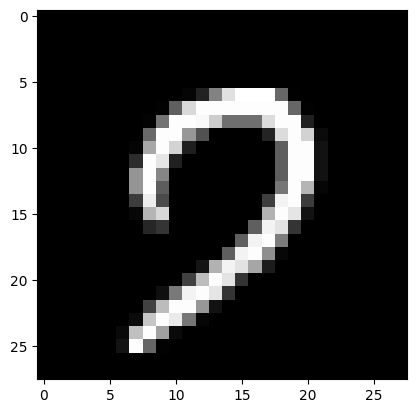

In [86]:
idx = 846
img, label = test_data[idx]
predicted_lb = predicted_labels[idx].item()

print(f"GT Label: {label}, Predicted: {predicted_lb}")
plt.imshow(img.squeeze())

In [91]:
model.layers[0].weight.shape

torch.Size([64, 784])

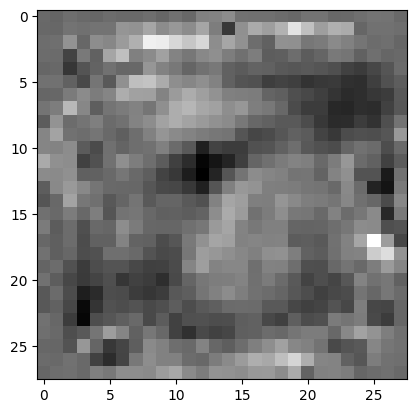

In [102]:
weight_idx = 10

selected_weight = model.layers[0].weight[weight_idx].clone().detach().cpu()
plt.imshow(selected_weight.reshape(28, 28))

1 1 9
1 2 10
1 3 11
1 4 12
1 5 13
1 6 14
1 7 15
2 1 17
2 2 18
2 3 19
2 4 20
2 5 21
2 6 22
2 7 23
3 1 25
3 2 26
3 3 27
3 4 28
3 5 29
3 6 30
3 7 31
4 1 33
4 2 34
4 3 35
4 4 36
4 5 37
4 6 38
4 7 39
5 1 41
5 2 42
5 3 43
5 4 44
5 5 45
5 6 46
5 7 47
6 1 49
6 2 50
6 3 51
6 4 52
6 5 53
6 6 54
6 7 55
7 1 57
7 2 58
7 3 59
7 4 60
7 5 61
7 6 62
7 7 63


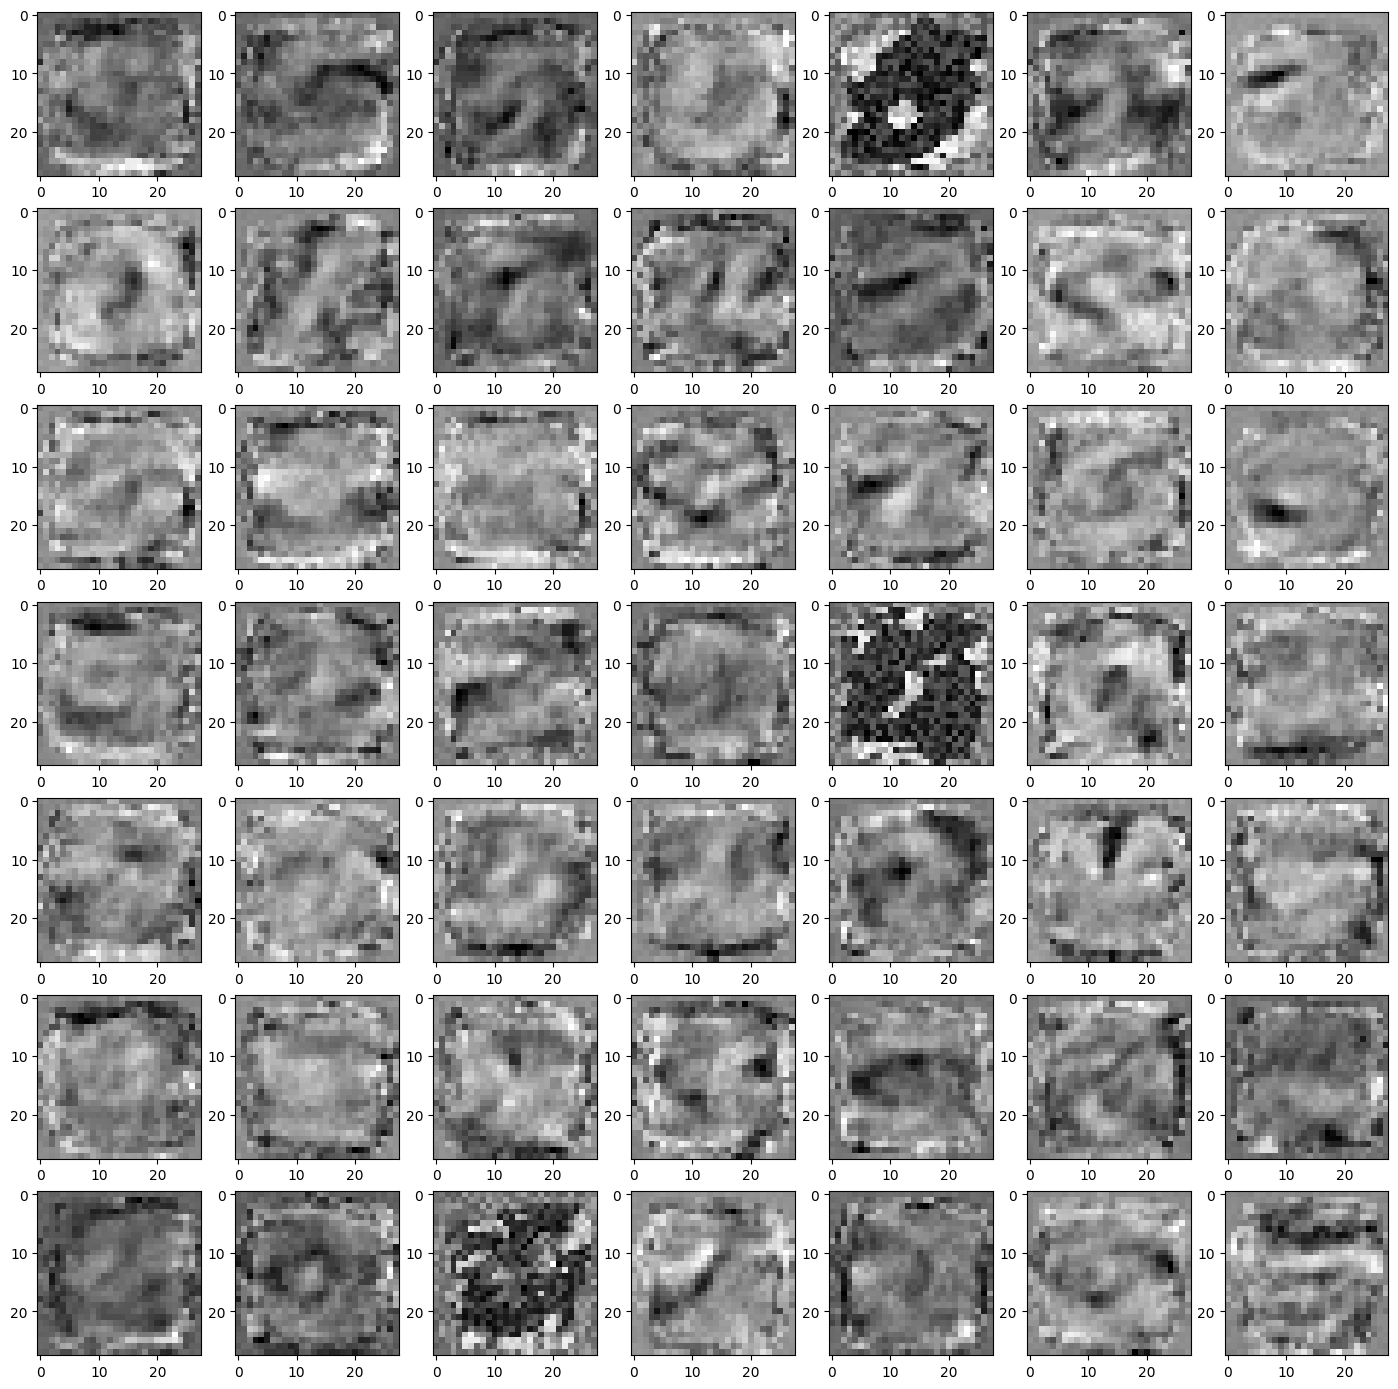

In [106]:
plt.figure(figsize=(20,20))

for i in range(1, 8):
  for j in range(1,8):
    plt.subplot(8, 8, i*8 + j)
    idx = (i-1) * 8 + j-1
    plt.imshow(model.layers[0].weight[idx].clone().detach().cpu().reshape(28,28))